## Exploratory Data Analysis
#### use the Chicago's inspection dataset to draw conclusions about the various facilities and the level of risk at which they are.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset=pd.read_csv("../Datasets/Food_Inspections_Python_cleaned.csv")
dataset.head()

C:\Users\junyang\AppData\Local\Temp\ipykernel_19228\1975300232.py:1: DtypeWarning: Columns (20,30,38,60) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv("../python/Food_Inspections_Python_cleaned.csv")


,Unnamed: 0,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,...,Violation 37,Violation 38,Violation 39,Violation 40,Violation 41,Violation 42,Violation 43,Violation 44,Violation 45,Violation 70
0,0,2079132.0,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2079129.0,JET'S PIZZA,JET'S PIZZA,2522268.0,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2079125.0,ROOM 1520,ROOM 1520,2446638.0,Special Event,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2079123.0,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2079105.0,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,Charter School,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,...,NaN,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,NaN,NaN,"41. PREMISES MAINTAINED FREE OF LITTER, UNNECE...",NaN,NaN,NaN,NaN,NaN


In [19]:
dataset['Year']=dataset['Inspection Date'].apply(lambda x:x.split('-')[0])
dataset['Month']=dataset['Inspection Date'].apply(lambda x:x.split('-')[1])
dataset['Day']=dataset['Inspection Date'].apply(lambda x:x.split('-')[2].split('T')[0])

#### There are four types of risk: high, medium, low and All. Most (over 70%) audited spots had high risk. Second one is medium with around 20% participation and the low risk with around 10% .

Text(0, 0.5, 'counts')

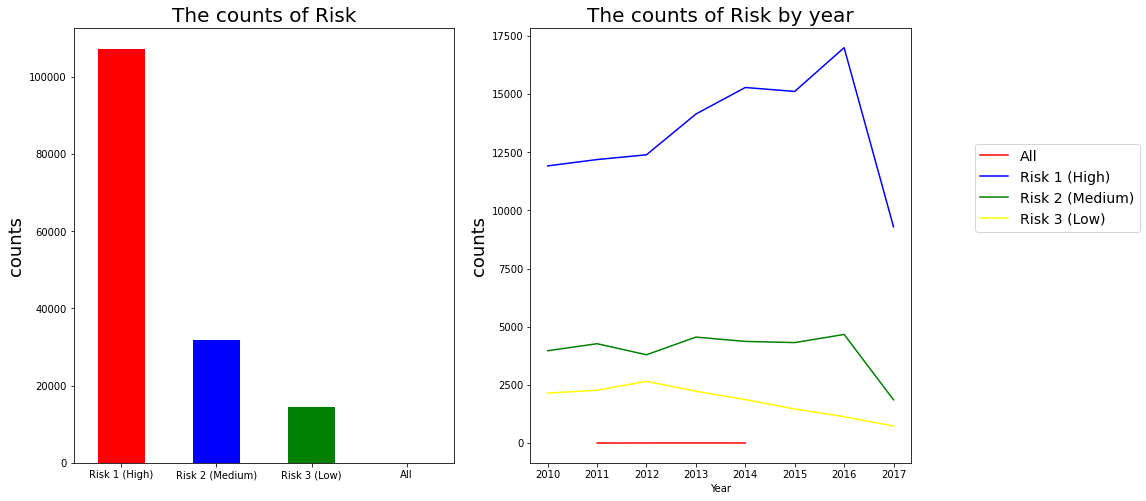

In [34]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
dataset.Risk.value_counts().plot(kind='bar',color=['red','blue','green','yellow'],ax=ax[0])
ax[0].tick_params(axis='x',labelrotation=360)
ax[0].set_title("The counts of Risk",size=20)
ax[0].set_ylabel('counts',size=18)


dataset.groupby(['Year','Risk'])['Inspection ID'].agg('count').unstack('Risk').plot(ax=ax[1],color=['red','blue','green','yellow'])
ax[1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,0.75))
ax[1].set_title("The counts of Risk by year",size=20)
ax[1].set_ylabel('counts',size=18)


#### Restaurant has the most number of facility with rating of high and medium risk(over 50%), most of the Grocery Store has rating of medium(around 20%) and low risk(over 50%).

Text(0.5, 0, 'counts')

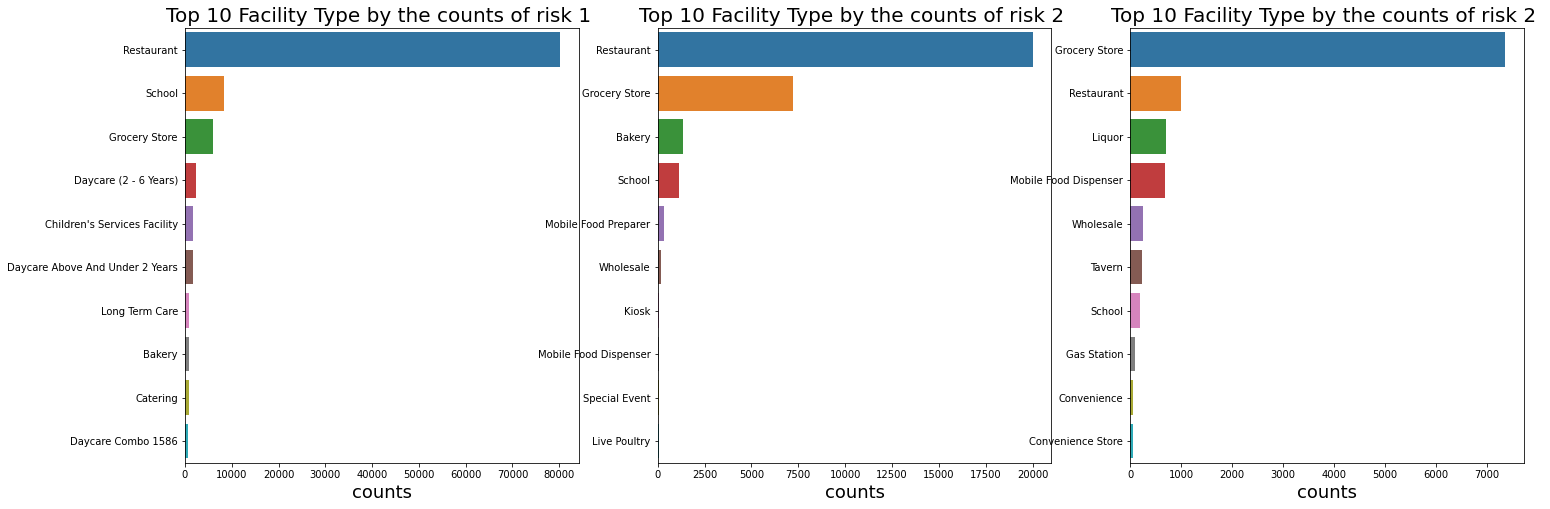

In [37]:
fig,ax=plt.subplots(1,3,figsize=(24,8))

sns.barplot(x=dataset[dataset.Risk=='Risk 1 (High)']['Facility Type'].value_counts()[:10],y=dataset[dataset.Risk=='Risk 1 (High)']['Facility Type'].value_counts()[:10].index,ax=ax[0])
ax[0].set_title("Top 10 Facility Type by the counts of risk 1 ",size=20)
ax[0].set_xlabel('counts',size=18)

sns.barplot(x=dataset[dataset.Risk=='Risk 2 (Medium)']['Facility Type'].value_counts()[:10],y=dataset[dataset.Risk=='Risk 2 (Medium)']['Facility Type'].value_counts()[:10].index,ax=ax[1])
ax[1].set_title("Top 10 Facility Type by the counts of risk 2 ",size=20)
ax[1].set_xlabel('counts',size=18)

sns.barplot(x=dataset[dataset.Risk=='Risk 3 (Low)']['Facility Type'].value_counts()[:10],y=dataset[dataset.Risk=='Risk 3 (Low)']['Facility Type'].value_counts()[:10].index,ax=ax[2])
ax[2].set_title("Top 10 Facility Type by the counts of risk 3 ",size=20)
ax[2].set_xlabel('counts',size=18)

#### I divide result on only two types: pass (normal and with conditions) and no pass (fail and other). Over 2/3 facilities pass the control, 1/3 fail or don't have control etc. As we can see in map, there is no spatial difference between facilities whose pass control and no pass. The center with the highest density of spots seems to be relatively safer than in other places.

Text(0, 0.5, 'LATITUDE')

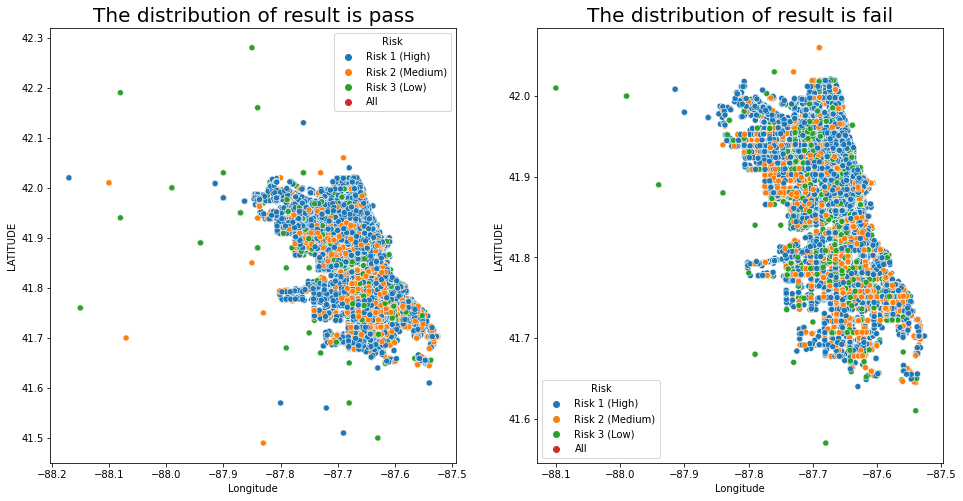

In [76]:
fig,ax=plt.subplots(1,2,figsize=(16,8))

sns.scatterplot(x='Longitude',y='Latitude',hue='Risk' ,hue_order=['Risk 1 (High)','Risk 2 (Medium)','Risk 3 (Low)','All'],data=dataset[(dataset.Results=='Pass') | (dataset.Results=='Pass W/ Conditions')], ax=ax[0])
ax[0].set_title("The distribution of result is pass",size=20)
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('LATITUDE')

sns.scatterplot(x='Longitude',y='Latitude',hue='Risk',hue_order=['Risk 1 (High)','Risk 2 (Medium)','Risk 3 (Low)','All'] ,data=dataset[(dataset.Results=='Fail') | (dataset.Results=='No Entry') | (dataset.Results=='Not Ready')], ax=ax[1])
ax[1].set_title("The distribution of result is fail",size=20)
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('LATITUDE')